# Object Oriented Programming (OOP)

## The FinancialInstrument Class live in action (Part 1)

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
sns.set()

In [2]:
class FinancialInstrument():
    ''' Class for analyzing Financial Instruments like stocks.

    Attributes
    ==========
    ticker: str
        ticker symbol with which to work with
    start: str
        start date for data retrieval
    end: str
        end date for data retrieval

    Methods
    =======
    get_data:
        retrieves daily price data (from yahoo finance) and prepares the data
    log_returns:
        calculates log returns
    plot_prices:
        creates a price chart
    plot_returns:
        plots log returns either as time series ("ts") or histogram ("hist")
    set_ticker:
        sets a new ticker
    mean_return:
        calculates mean return
    std_returns:
        calculates the standard deviation of returns (risk)
    annualized_perf:
        calculates annulized return and risk
    '''
    
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def __repr__(self): 
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self.ticker, 
                                                                               self.start, self.end)
    def get_data(self):
        ''' retrieves (from yahoo finance) and prepares the data
        '''
        raw = yf.download(self.ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
        
    def log_returns(self):
        '''calculates log returns
        '''
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        ''' creates a price chart
        '''
        self.data.price.plot(figsize = (12, 8))
        plt.title("Price Chart: {}".format(self.ticker), fontsize = 15)
    
    def plot_returns(self, kind = "ts"):
        ''' plots log returns either as time series ("ts") or histogram ("hist")
        '''
        if kind == "ts":
            self.data.log_returns.plot(figsize = (12, 8))
            plt.title("Returns: {}".format(self.ticker), fontsize = 15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (12, 8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self.ticker), fontsize = 15)
    
    def set_ticker(self, ticker = None):
        '''sets a new ticker
        '''
        if ticker is not None:
            self.ticker = ticker
            self.get_data()
            self.log_returns()
            
    def mean_return(self, freq = None):
        '''calculates mean return
        '''
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
    
    def std_returns(self, freq = None):
        '''calculates the standard deviation of returns (risk)
        '''
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()
        
    def annualized_perf(self):
        '''calculates annulized return and risk
        '''
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))

## Instantiation

In [3]:
stock = FinancialInstrument(ticker='AAPL', start='2010-01-01', end='2023-10-30')

[*********************100%%**********************]  1 of 1 completed


In [4]:
stock

FinancialInstrument(ticker = AAPL, start = 2010-01-01, end = 2023-10-30)

In [5]:
type(stock)

__main__.FinancialInstrument

## Attributes

In [6]:
stock.ticker

'AAPL'

In [7]:
stock.start

'2010-01-01'

In [8]:
stock.data

,price,log_returns
Date,,
2010-01-04,7.643214,NaN
2010-01-05,7.656429,0.001727
2010-01-06,7.534643,-0.016034
2010-01-07,7.520714,-0.001850
2010-01-08,7.570714,0.006626
...,...,...
2023-10-23,173.000000,0.000694
2023-10-24,173.440002,0.002540
2023-10-25,171.100006,-0.013584


## Methods

In [15]:
import cufflinks as cf
stock.data.price.iplot()

In [16]:
stock.annualized_perf()

Return: 0.224 | Risk: 0.284


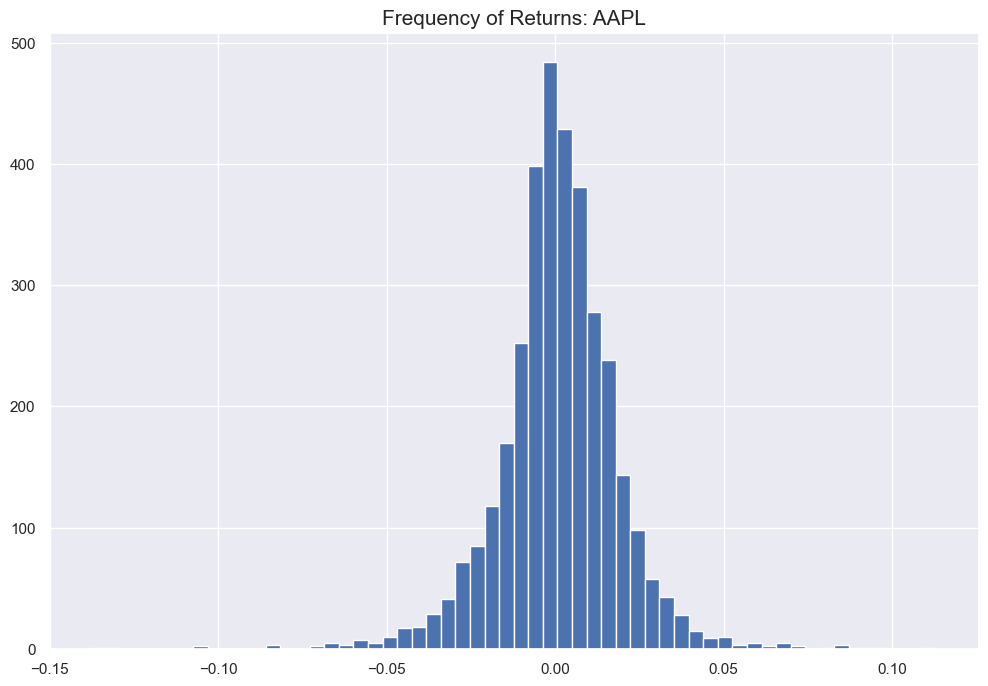

In [17]:
stock.plot_returns(kind='hist')

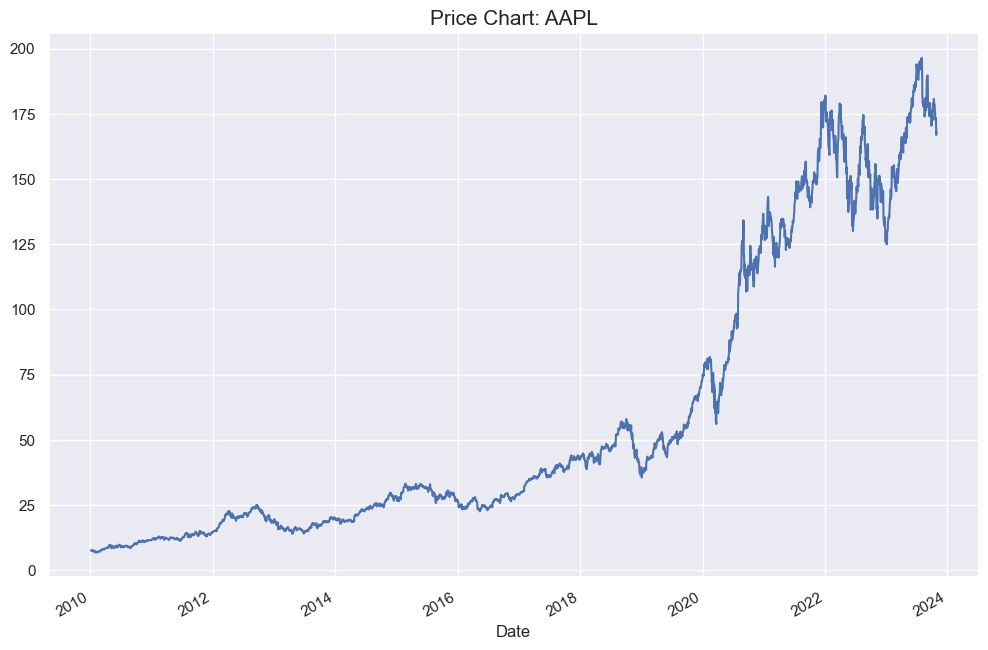

In [18]:
stock.plot_prices()

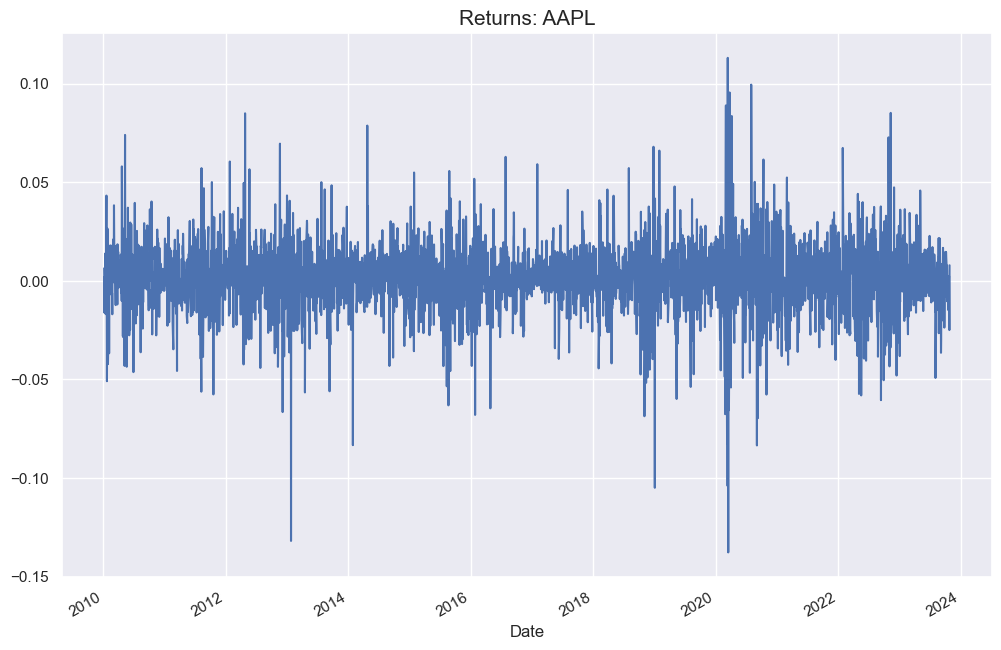

In [19]:
stock.plot_returns()